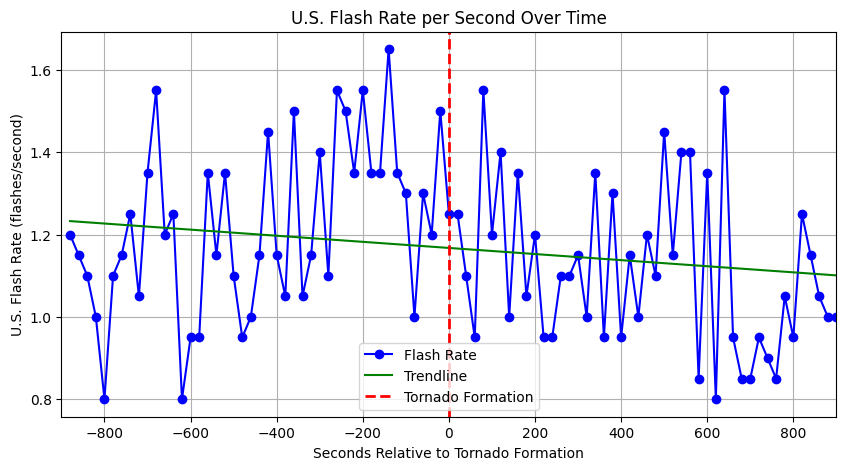

In [6]:
import os
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt

# Define the directory containing the NetCDF files
data_dir = r'C:\Users\jinge\OneDrive\Documents\Research\Lightning Data\noaa-goes17\GLM-L2-LCFA\2022\150\13_14'

# Define the geographical bounds of the contiguous United States
lat_bounds = (24.396308, 49.384358)
lon_bounds = (-125.0, -66.934570)

# Get the list of NetCDF files in the directory
netcdf_files = sorted([f for f in os.listdir(data_dir) if f.endswith('.nc')])

# Initialize a list to store the number of U.S. flashes per file
num_us_flashes_per_file = []

# Iterate through each NetCDF file to extract and filter the flash information
for file in netcdf_files:
    # Construct the file path
    file_path = os.path.join(data_dir, file)
    
    # Load the data from the NetCDF file
    data = xr.open_dataset(file_path)
    
    # Extract the latitude and longitude coordinates of the flashes
    flash_lat = data['flash_lat'].values if 'flash_lat' in data.variables else np.array([])
    flash_lon = data['flash_lon'].values if 'flash_lon' in data.variables else np.array([])
    
    # Filter the flashes to include only those within the U.S. bounds
    us_flashes = ((flash_lat >= lat_bounds[0]) & (flash_lat <= lat_bounds[1]) &
                  (flash_lon >= lon_bounds[0]) & (flash_lon <= lon_bounds[1]))
    num_us_flashes = np.sum(us_flashes)
    
    # Append the number of U.S. flashes to the list
    num_us_flashes_per_file.append(num_us_flashes)
    
    # Close the dataset
    data.close()

# Calculate the flash rate per second for each file
us_flash_rate_per_second = np.array(num_us_flashes_per_file) / 20

time_interval = 20  # seconds per file interval
time_relative_to_tornado = (np.arange(len(netcdf_files)) - 44) * time_interval

# Fit a polynomial of degree 1 (linear fit) to the data
coefficients = np.polyfit(time_relative_to_tornado, us_flash_rate_per_second, 1)
polynomial = np.poly1d(coefficients)
trendline = polynomial(time_relative_to_tornado)

# Create the plot for U.S. flash rate per second with the trendline
plt.figure(figsize=(10, 5))
plt.plot(time_relative_to_tornado, us_flash_rate_per_second, marker='o', linestyle='-', color='blue', label='Flash Rate')
plt.plot(time_relative_to_tornado, trendline, label='Trendline', color='green')

# Add a red vertical line at the index where the tornado formation is assumed to occur
plt.axvline(x=0, color='red', linestyle='--', linewidth=2, label='Tornado Formation')

# Adjust the x-axis label to reflect the change
plt.xlabel('Seconds Relative to Tornado Formation')

# Add the rest of the labels and the grid
plt.ylabel('U.S. Flash Rate (flashes/second)')
plt.title('U.S. Flash Rate per Second Over Time')
plt.legend()
plt.grid(True)

# Adjust the x-axis to cover from -900 to 900 seconds, assuming we have the data to cover this range
plt.xlim(-900, 900)

# Show the plot
plt.show()